## Import Library


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from IPython.display import display

In [ ]:
# Membaca dataset
data = pd.read_csv('/content/DATASET CAPSTONE.csv')

## Eksplorasi data

In [ ]:
# Menampilkan beberapa baris pertama untuk memahami struktur data
print("Beberapa Baris Data:")
print(data.head())

Beberapa Baris Data:
  PatientID             AgeGroup       Department      AppointmentType  \
0   P100000        Adult (36-60)      Orthopedics          New Patient   
1   P100001        Adult (36-60)       Cardiology  Specialist Referral   
2   P100002  Young Adult (18-35)  General Surgery  Specialist Referral   
3   P100003        Adult (36-60)        Emergency          Urgent Care   
4   P100004         Senior (61+)       Cardiology          Urgent Care   

  InsuranceType ArrivalMethod   VisitDate   AppointmentTime ActualArrivalTime  \
0       Private       Walk-in  15-03-2024  15-03-2024 14:00  15-03-2024 13:32   
1      Self-pay     Scheduled  01-01-2024  01-01-2024 09:45  01-01-2024 09:36   
2      Medicaid     Scheduled  19-01-2024  19-01-2024 16:15  19-01-2024 16:07   
3           NaN     Emergency  27-03-2024  27-03-2024 11:00  27-03-2024 10:59   
4      Medicare     Scheduled  10-03-2024  10-03-2024 16:45  10-03-2024 16:48   

        CheckInTime  ... TestsToDischargeTime T

In [ ]:
# Menampilkan statistik deskriptif
print("Statistik Deskriptif:")
print(data.describe())

Statistik Deskriptif:
       FacilityOccupancyRate  ProvidersOnShift  NursesOnShift  \
count            5000.000000       5000.000000     5000.00000   
mean                0.626616          4.986600        9.03420   
std                 0.187395          1.994296        3.73098   
min                 0.300000          2.000000        3.00000   
25%                 0.460000          3.000000        6.00000   
50%                 0.630000          5.000000        9.00000   
75%                 0.790000          7.000000       12.00000   
max                 0.950000          8.000000       15.00000   

       StaffToPatientRatio  IsRegistered  IsOnlineBooking    Year         Day  \
count          5000.000000   5000.000000      5000.000000  5000.0  5000.00000   
mean              0.302068      0.297800         0.702200  2024.0    15.67720   
std               0.115172      0.457337         0.457337     0.0     8.80171   
min               0.100000      0.000000         0.000000  2024.0   


Visualisasi Outlier (Boxplot):


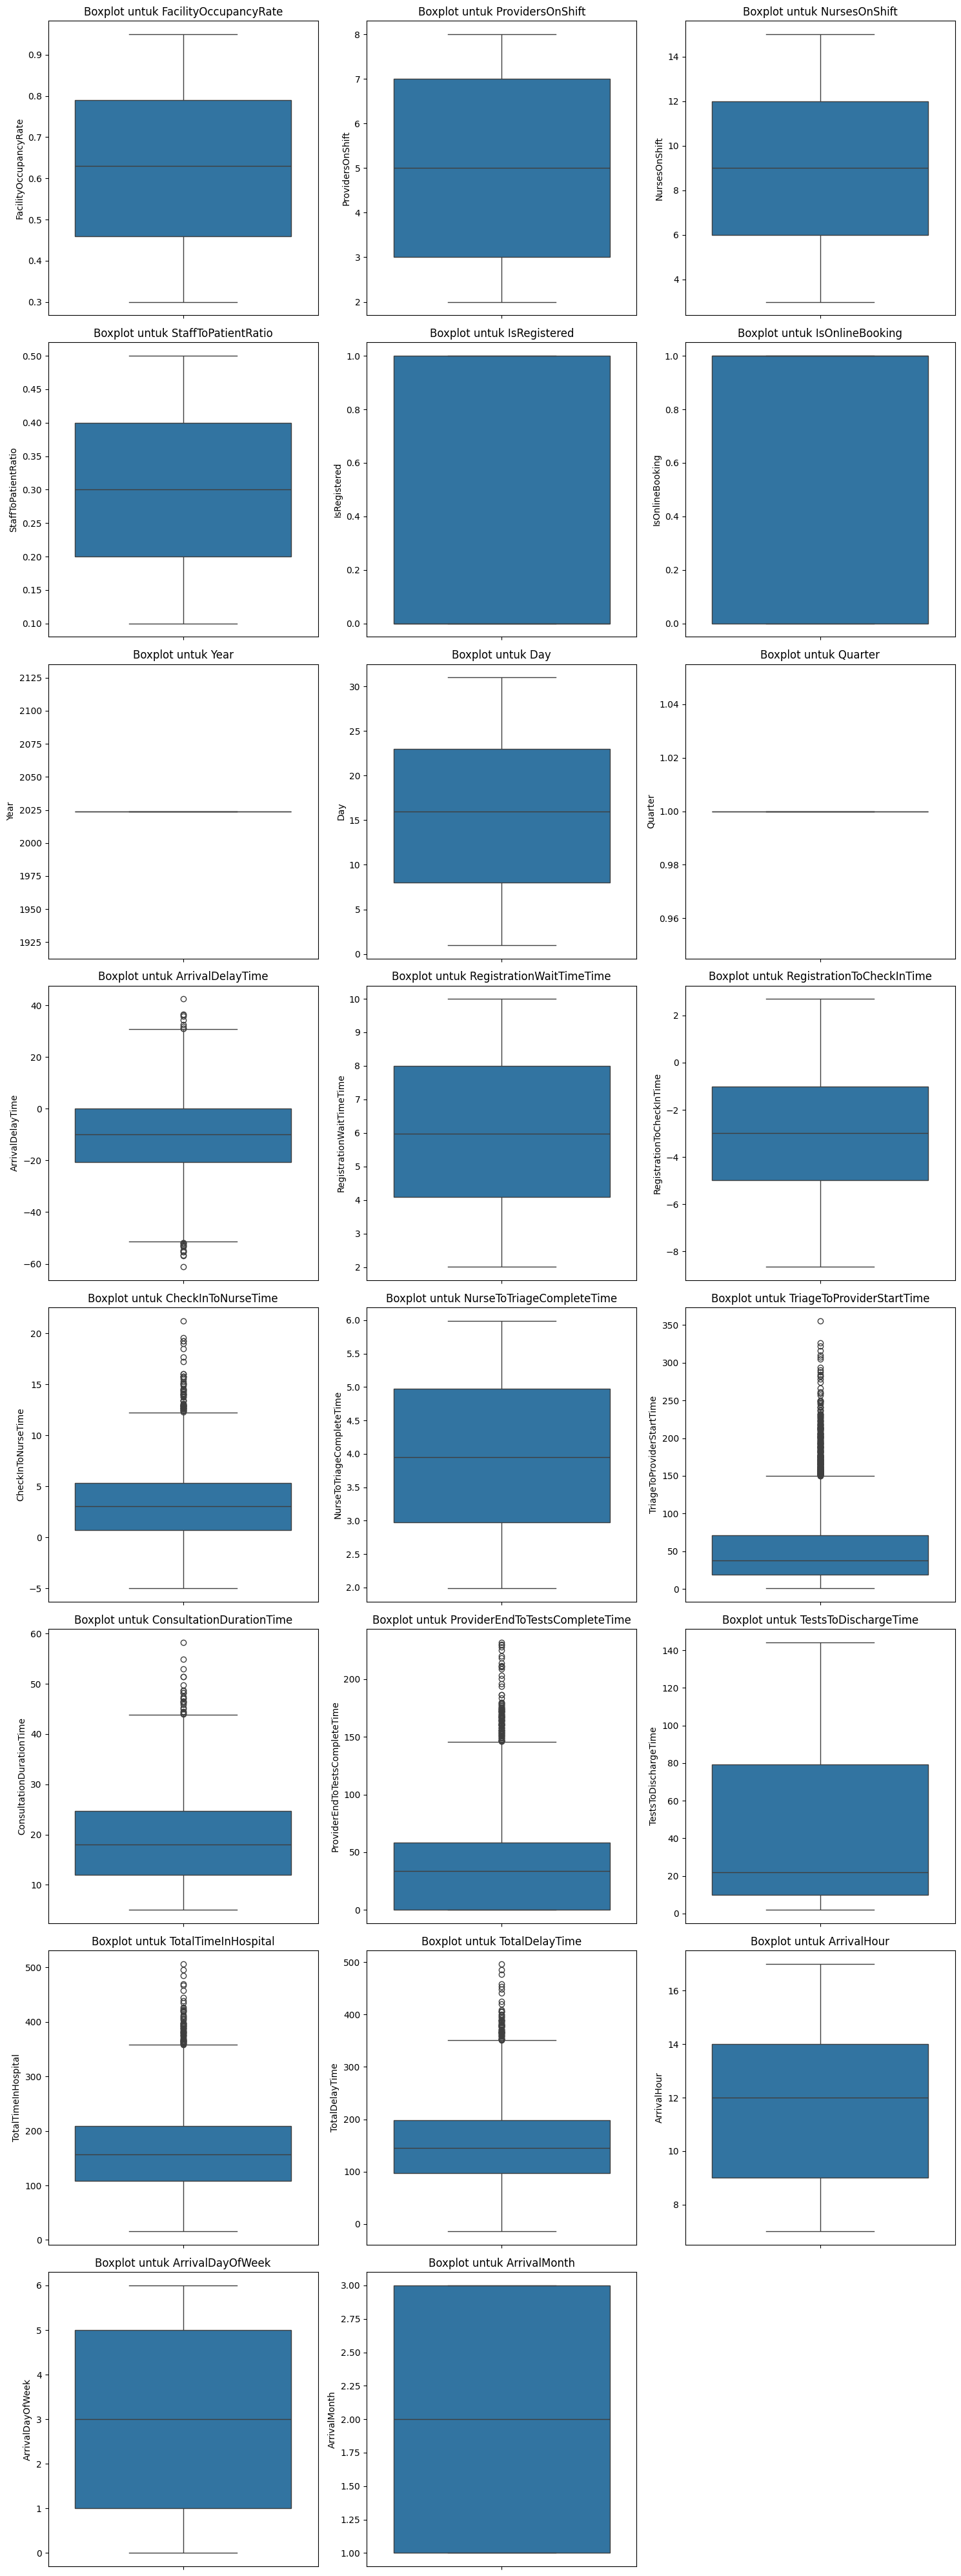

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
def display_outlier_boxplot(df):
    """
    Menampilkan boxplot untuk setiap kolom numerik dalam DataFrame untuk memvisualisasikan outlier.

    Args:
        df (pd.DataFrame): DataFrame yang akan divisualisasikan.
    """
    numerical_cols = df.select_dtypes(include=np.number).columns
    num_cols = len(numerical_cols)
    n_cols = 3  # Jumlah kolom subplot
    n_rows = (num_cols + n_cols - 1) // n_cols  # Jumlah baris subplot

    plt.figure(figsize=(15, n_rows * 5))

    for i, col in enumerate(numerical_cols):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot untuk {col}')
        plt.ylabel(col)

    plt.tight_layout()
    plt.show()

# Menampilkan boxplot untuk visualisasi outlier
print("\nVisualisasi Outlier (Boxplot):")
display_outlier_boxplot(data)


In [ ]:
# 1. Cek missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
PatientID                            0
AgeGroup                             0
Department                           0
AppointmentType                      0
InsuranceType                      978
ArrivalMethod                        0
VisitDate                            0
AppointmentTime                      0
ActualArrivalTime                    0
CheckInTime                          0
TriageCompleteTime                   0
ProviderStartTime                    0
ProviderEndTime                      0
TestsCompleteTime                    0
DischargeTime                        0
TriageCategory                       0
ReasonForVisit                       0
TestsOrdered                      1490
ConsultationNeeded                   0
ProviderID                           0
RoomNumber                           0
FacilityOccupancyRate                0
ProvidersOnShift                     0
NursesOnShift                        0
StaffToPatientRatio                  0
ArrivalDa

## Analisis korelasi antar fitur numerik dalam dataset.

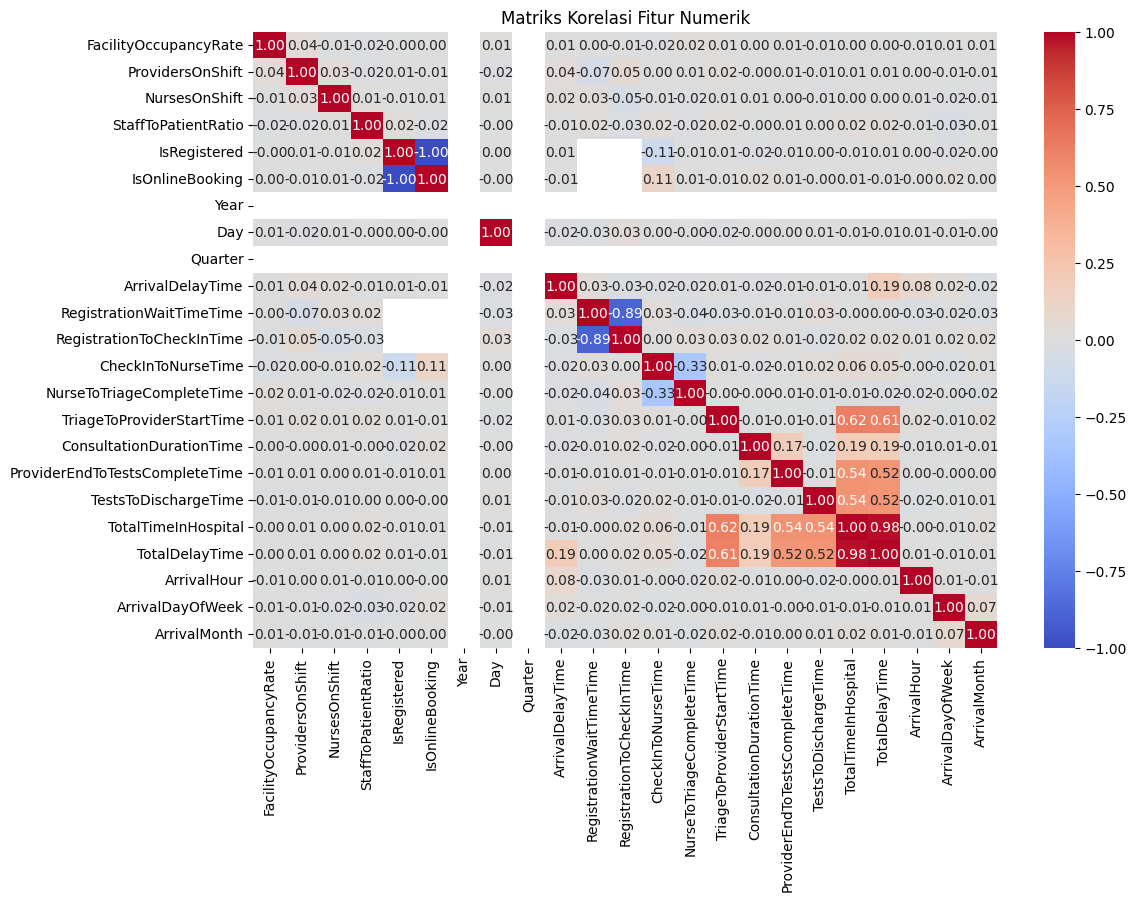

In [ ]:
numeric_df = data.select_dtypes(include=np.number) # Pilih hanya kolom numerik

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Fitur Numerik')
plt.show()

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 57 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   PatientID                       5000 non-null   object 
 1   AgeGroup                        5000 non-null   object 
 2   Department                      5000 non-null   object 
 3   AppointmentType                 5000 non-null   object 
 4   InsuranceType                   4022 non-null   object 
 5   ArrivalMethod                   5000 non-null   object 
 6   VisitDate                       5000 non-null   object 
 7   AppointmentTime                 5000 non-null   object 
 8   ActualArrivalTime               5000 non-null   object 
 9   CheckInTime                     5000 non-null   object 
 10  TriageCompleteTime              5000 non-null   object 
 11  ProviderStartTime               5000 non-null   object 
 12  ProviderEndTime                 50

## Data Preprocessing

In [ ]:
# Menangani missing values pada kolom kategorikal
data['InsuranceType'] = data['InsuranceType'].fillna('Unknown')
data['TestsOrdered'] = data['TestsOrdered'].fillna('Unknown')
data['RegistrationTime'] = data['RegistrationTime'].fillna('Unknown')
data['RegistrationWaitTimeTime'] = data['RegistrationWaitTimeTime'].fillna('Unknown')
# Perbaiki typo di baris bawah ini
data['RegistrationToCheckInTime'] = data['RegistrationToCheckInTime'].fillna('Unknown')

# Setelah memperbaiki, jalankan kembali sel ini dan sel-sel berikutnya.
# Pastikan tidak ada kode lain yang secara tidak sengaja menghapus atau mengganti nama kolom ini
# antara langkah ini dan langkah pd.get_dummies.

## Menangani missing values

In [ ]:
import pandas as pd
import numpy as np

# Asumsikan data adalah dataframe kita
print(f"Total baris: {len(data)}")
print(f"Missing RegistrationTime: {data['RegistrationTime'].isna().sum()}")

# Buat kolom flag missing
data['RegistrationTime_missing'] = data['RegistrationTime'].isna().astype(int)

# Konversi 'RegistrationTime' ke datetime, ubah nilai yang tidak valid menjadi NaT
data['RegistrationTime'] = pd.to_datetime(data['RegistrationTime'], errors='coerce')

# Isi nilai missing dengan tanggal awal dataset / placeholder
min_date = data['RegistrationTime'].min()
if pd.isna(min_date):
    # Jika min_date juga NaT, pakai tanggal default
    min_date = pd.to_datetime('2000-01-01')

data['RegistrationTime'] = data['RegistrationTime'].fillna(min_date)

# Cek ulang missing
print(f"Missing setelah imputasi: {data['RegistrationTime'].isna().sum()}")

Total baris: 5000
Missing RegistrationTime: 0
Missing setelah imputasi: 0


<ipython-input-10-c8bc70419358>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['RegistrationTime'] = pd.to_datetime(data['RegistrationTime'], errors='coerce')


## Menangani outlier


Menangani Outlier menggunakan metode IQR:
Menangani kolom: ArrivalDelayTime
Menangani kolom: CheckInToNurseTime
Menangani kolom: TriageToProviderStartTime
Menangani kolom: ConsultationDurationTime
Menangani kolom: ProviderEndToTestsCompleteTime
Menangani kolom: TestsToDischargeTime
Menangani kolom: TotalTimeInHospital
Menangani kolom: TotalDelayTime

Visualisasi Outlier (Boxplot) Setelah Penanganan:


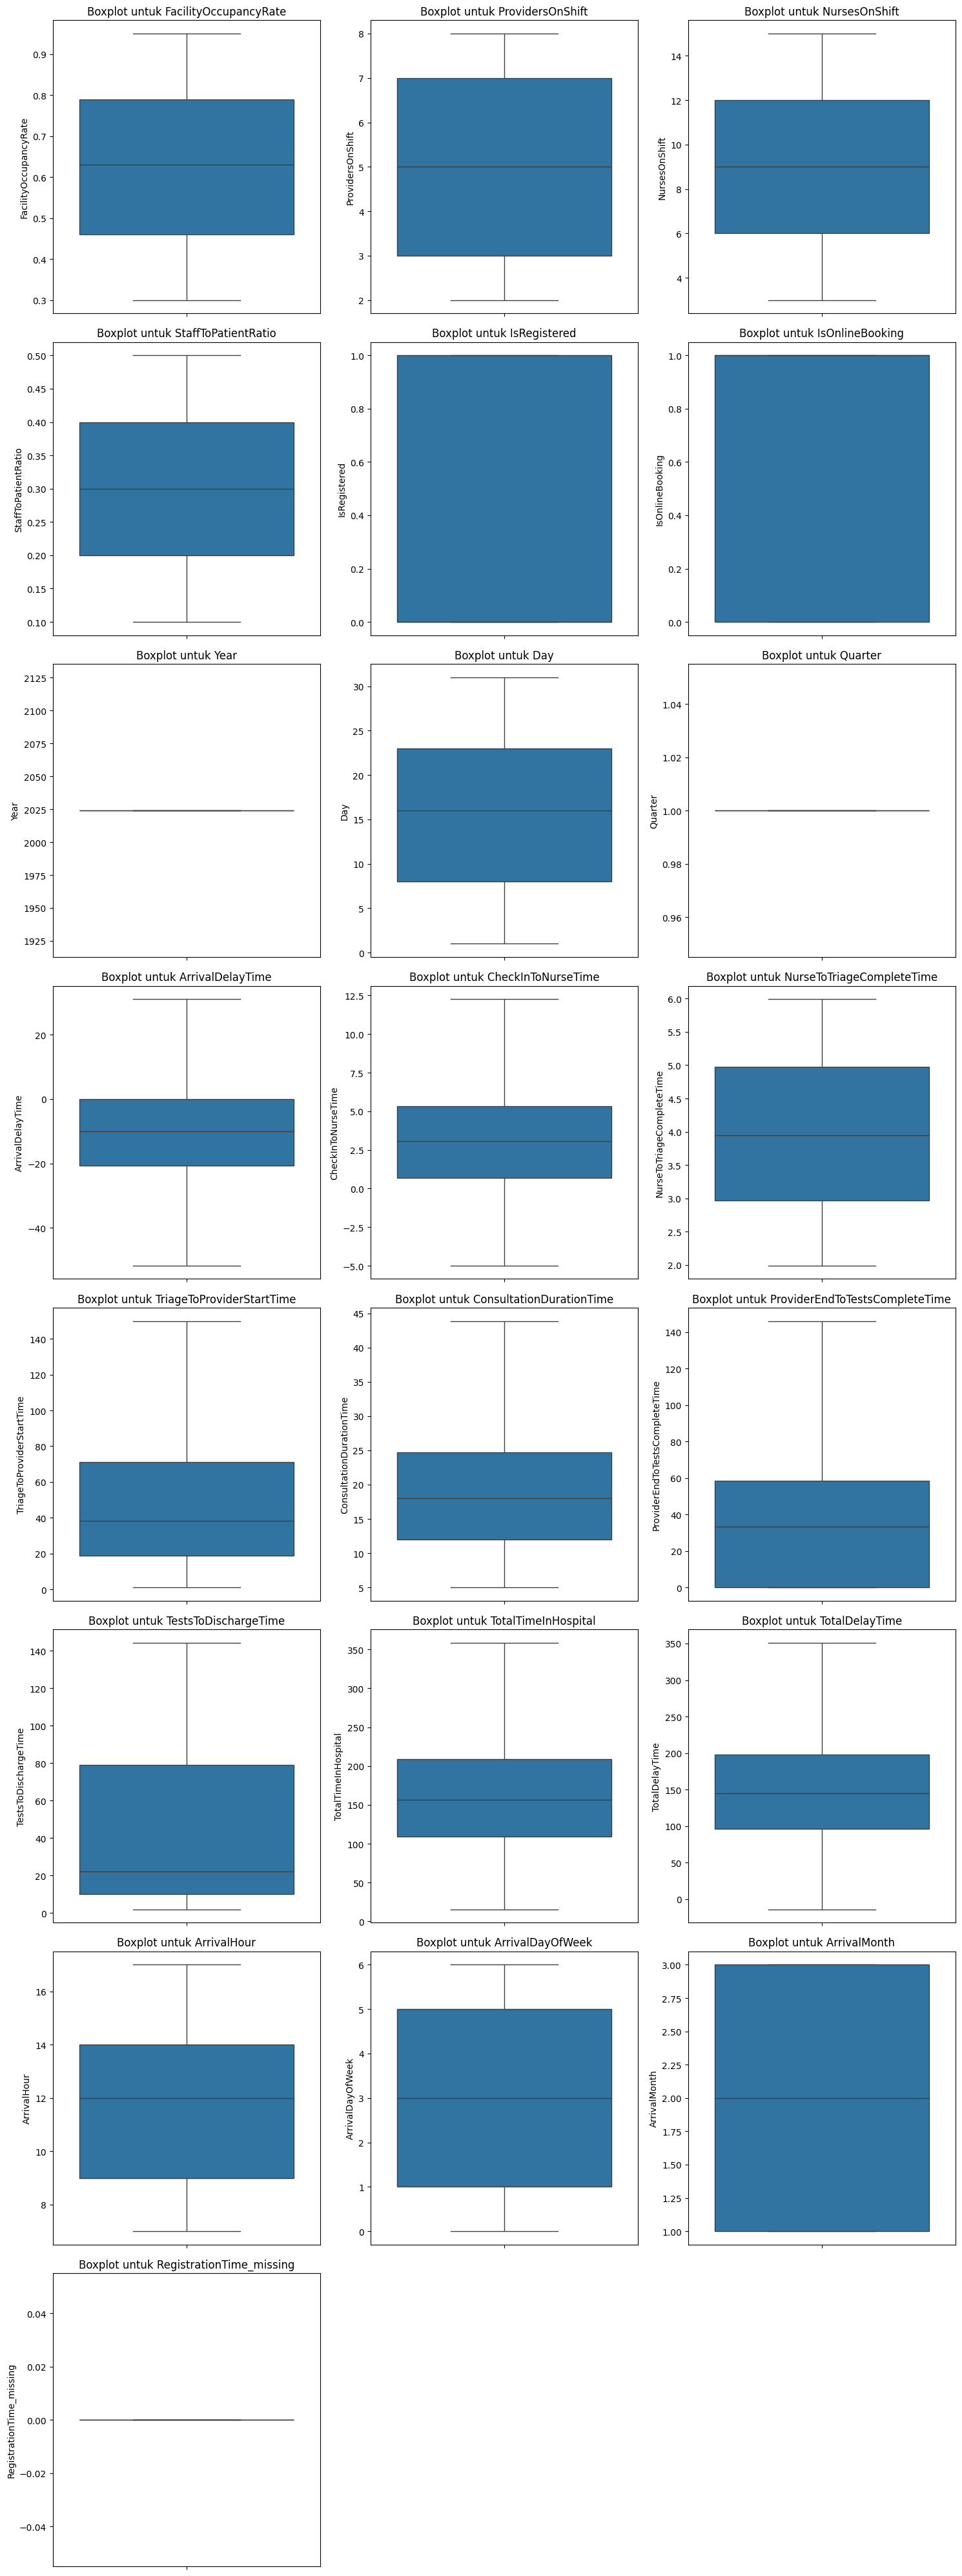


Statistik Deskriptif Setelah Penanganan Outlier:
       ArrivalDelayTime  CheckInToNurseTime  TriageToProviderStartTime  \
count       5000.000000         5000.000000                5000.000000   
mean         -10.251508            3.150279                  49.710620   
std           15.095246            3.432710                  39.746530   
min          -51.791667           -4.989333                   1.000000   
25%          -20.716667            0.698871                  18.712500   
50%           -9.983333            3.065646                  38.200000   
75%            0.000000            5.323125                  71.216667   
max           31.075000           12.259506                 149.972917   

       ConsultationDurationTime  ProviderEndToTestsCompleteTime  \
count               5000.000000                     5000.000000   
mean                  18.691440                       38.406081   
std                    8.990021                       36.605573   
min            

In [ ]:
import numpy as np
outlier_cols = [
    'ArrivalDelayTime',
    'CheckInToNurseTime',
    'TriageToProviderStartTime',
    'ConsultationDurationTime',
    'ProviderEndToTestsCompleteTime',
    'TestsToDischargeTime',
    'TotalTimeInHospital',
    'TotalDelayTime'
]

# Fungsi untuk mendeteksi dan menangani outlier menggunakan IQR
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Batasi nilai yang di luar batas dengan nilai batas
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Terapkan penanganan outlier pada kolom-kolom yang teridentifikasi
print("\nMenangani Outlier menggunakan metode IQR:")
for col in outlier_cols:
    if col in data.columns and data[col].dtype in [np.float64, np.int64]:
        print(f"Menangani kolom: {col}")
        data = handle_outliers_iqr(data, col)
    else:
        print(f"Kolom '{col}' tidak ditemukan atau bukan tipe numerik.")

# Setelah penanganan outlier, tampilkan kembali boxplot untuk melihat hasilnya
print("\nVisualisasi Outlier (Boxplot) Setelah Penanganan:")
display_outlier_boxplot(data)

# Tampilkan statistik deskriptif setelah penanganan outlier
print("\nStatistik Deskriptif Setelah Penanganan Outlier:")
print(data[outlier_cols].describe())


## Konversi dan validasi tipe data

In [ ]:
import pandas as pd

time_columns = ['AppointmentTime', 'ActualArrivalTime', 'CheckInTime',
    'TriageCompleteTime', 'ProviderStartTime', 'ProviderEndTime',
    'TestsCompleteTime', 'DischargeTime', 'RegistrationTime',
    'FirstSeenByNurseTime', 'DoctorOrProcedureStartTime']

for col in time_columns:
    # Use errors='coerce' to turn unparseable dates into NaT
    data[col] = pd.to_datetime(data[col], errors='coerce')

# After converting, check for NaT values to identify which columns had issues
print("\nChecking for NaT values after datetime conversion:")
for col in time_columns:
    nat_count = data[col].isna().sum()
    if nat_count > 0:
        print(f"Column '{col}' has {nat_count} NaT values (originally unparseable).")

# You can then inspect the rows with NaT values in the problematic columns,
# for example: data[data['FirstSeenByNurseTime'].isna()]

<ipython-input-12-c1af18b67b6c>:10: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data[col] = pd.to_datetime(data[col], errors='coerce')
<ipython-input-12-c1af18b67b6c>:10: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data[col] = pd.to_datetime(data[col], errors='coerce')
<ipython-input-12-c1af18b67b6c>:10: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data[col] = pd.to_datetime(data[col], errors='coerce')
<ipython-input-12-c1af18b67b6c>:10: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data[col] = pd.


Checking for NaT values after datetime conversion:
Column 'FirstSeenByNurseTime' has 2988 NaT values (originally unparseable).
Column 'DoctorOrProcedureStartTime' has 2984 NaT values (originally unparseable).


<ipython-input-12-c1af18b67b6c>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col], errors='coerce')


## Encoding kolom kategorikal menggunakan one-hot encoding

In [ ]:
# Melakukan encoding pada kolom 'Department' dan fitur kategorikal lainnya tanpa drop_first=True
data_encoded = pd.get_dummies(data, columns=['IsRegistered', 'IsOnlineBooking', 'ArrivalDayOfWeek', 'ArrivalMonth', 'Quarter', 'AgeGroup',
    'Department',
    'AppointmentType',
    'InsuranceType',
    'ArrivalMethod',
    'TriageCategory',
    'ReasonForVisit',
    'TestsOrdered',
    'ProviderID',
    'RoomNumber',
    'AssignedDepartment',
    'BookingType',
    'Month',
    'DayOfWeek',
    'IsWeekend',
    'OccupancyRateBin',
    'ProvidersOnShiftBin',
    'NursesOnShiftBin',
    'StaffPatientRatioBin'
   ], drop_first=False)  # Mengubah drop_first=True menjadi drop_first=False

# Menampilkan beberapa baris untuk memeriksa hasil encoding
print(data_encoded.head())


  PatientID   VisitDate     AppointmentTime   ActualArrivalTime  \
0   P100000  15-03-2024 2024-03-15 14:00:00 2024-03-15 13:32:00   
1   P100001  01-01-2024 2024-01-01 09:45:00 2024-01-01 09:36:00   
2   P100002  19-01-2024 2024-01-19 16:15:00 2024-01-19 16:07:00   
3   P100003  27-03-2024 2024-03-27 11:00:00 2024-03-27 10:59:00   
4   P100004  10-03-2024 2024-03-10 16:45:00 2024-03-10 16:48:00   

          CheckInTime  TriageCompleteTime   ProviderStartTime  \
0 2024-03-15 13:36:00 2024-03-15 13:44:00 2024-03-15 14:15:00   
1 2024-01-01 09:41:00 2024-01-01 09:48:00 2024-01-01 11:32:00   
2 2024-01-19 16:10:00 2024-01-19 16:18:00 2024-01-19 19:25:00   
3 2024-03-27 11:02:00 2024-03-27 11:11:00 2024-03-27 11:18:00   
4 2024-03-10 16:52:00 2024-03-10 17:04:00 2024-03-10 19:00:00   

      ProviderEndTime   TestsCompleteTime       DischargeTime  ...  \
0 2024-03-15 14:37:00 2024-03-15 14:52:00 2024-03-15 16:03:00  ...   
1 2024-01-01 11:53:00 2024-01-01 11:53:00 2024-01-01 11:57:00  ...

In [ ]:
# Menampilkan semua nama poli yang ada di kolom 'Department'
unique_departments_before_mapping = data['Department'].unique() # Simpan untuk perbandingan jika perlu

# Menampilkan hasil
print("Nama-nama poli yang ada di kolom 'Department' (sebelum mapping):")
print(unique_departments_before_mapping)

Nama-nama poli yang ada di kolom 'Department' (sebelum mapping):
['Orthopedics' 'Cardiology' 'General Surgery' 'Emergency' 'Radiology'
 'Obstetrics' 'Neurology' 'Oncology' 'Pediatrics' 'Internal Medicine']


##  Feature Engineering

In [ ]:
# --- 1. Pemetaan Kolom 'Department' ---
department_mapping = {
    'Orthopedics': 'Poli Umum',
    'Pediatrics': 'Poli KIA/KB',
    'Neurology': 'Poli Lansia',
    'General Surgery': 'Poli Gigi',
    'Cardiology': 'Poli Umum',
    'Emergency': 'Poli Umum',
    'Radiology': 'Poli Umum',
    'Obstetrics': 'Poli Umum',
    'Oncology': 'Poli Umum',
    'Internal Medicine': 'Poli Umum'
}

# Mengganti nama-nama poli di kolom 'Department' sesuai dengan mapping
data['Department'] = data['Department'].replace(department_mapping)

# --- 2. Mengekstrak informasi dari 'VisitDate' ---
# Pastikan 'VisitDate' sudah dalam format datetime
data['VisitDate'] = pd.to_datetime(data['VisitDate'], format='%d-%m-%Y')

# Menambahkan kolom 'Year', 'Month', 'Day', 'DayOfWeek', dan 'Quarter'
data['Year'] = data['VisitDate'].dt.year
data['Month'] = data['VisitDate'].dt.month
data['Day'] = data['VisitDate'].dt.day
data['DayOfWeek'] = data['VisitDate'].dt.weekday  # 0 = Monday, 6 = Sunday
data['Quarter'] = data['VisitDate'].dt.quarter

# Menentukan apakah hari tersebut akhir pekan
data['IsWeekend'] = data['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

# --- 3. Melakukan Encoding Kolom Kategorikal ---
# Melakukan encoding hanya pada kolom-kolom kategorikal selain Month, DayOfWeek, Quarter, dan IsWeekend
data_encoded = pd.get_dummies(data, columns=[
    'Department', 'IsRegistered', 'IsOnlineBooking', 'ArrivalDayOfWeek', 'ArrivalMonth', 'AgeGroup',
    'AppointmentType', 'InsuranceType', 'ArrivalMethod', 'TriageCategory', 'ReasonForVisit',
    'TestsOrdered', 'ProviderID', 'RoomNumber', 'AssignedDepartment', 'BookingType', 'OccupancyRateBin',
    'ProvidersOnShiftBin', 'NursesOnShiftBin', 'StaffPatientRatioBin'], drop_first=False)

# Menambahkan kolom-kolom numerik yang telah ada (Month, DayOfWeek, Quarter, IsWeekend)
data_encoded['Month'] = data['Month']
data_encoded['DayOfWeek'] = data['DayOfWeek']
data_encoded['IsWeekend'] = data['IsWeekend']
data_encoded['Quarter'] = data['Quarter']

# Menampilkan kolom yang ada setelah encoding
print("\nKolom yang ada dalam data_encoded setelah encoding:")
print(data_encoded.columns.tolist())

# --- Feature Selection (Based on Correlation) ---
target_variable = 'TotalTimeInHospital'

# Select only numeric columns from data_encoded before calculating correlation
numeric_data_encoded = data_encoded.select_dtypes(include=['number'])

# Menampilkan kolom numerik yang ada setelah encoding
print("\nKolom numerik yang ada setelah encoding:")
print(numeric_data_encoded.columns.tolist())

# Hitung matriks korelasi untuk data_encoded
correlation_matrix_encoded = numeric_data_encoded.corr()

# Dapatkan korelasi fitur dengan target variabel
if target_variable in correlation_matrix_encoded.columns:
    correlation_with_target = correlation_matrix_encoded[target_variable].sort_values(ascending=False)

    # Tampilkan korelasi
    print("\nKorelasi Fitur dengan Target Variabel:")
    print(correlation_with_target)

    # Tentukan threshold korelasi (Anda bisa menyesuaikan nilai ini)
    correlation_threshold = 0.1  # Contoh threshold

    # Pilih fitur-fitur yang korelasinya dengan target di atas threshold absolut
    highly_correlated_features = correlation_with_target[abs(correlation_with_target) > correlation_threshold].index.tolist()

    # Pastikan target variabel tidak termasuk dalam daftar fitur yang dipilih
    if target_variable in highly_correlated_features:
        highly_correlated_features.remove(target_variable)

    print(f"\nFitur yang dipilih berdasarkan korelasi (threshold > {correlation_threshold}):")
    print(highly_correlated_features)

    # --- Memastikan 'Department' dan Fitur Baru Masuk dalam Fitur ---
    department_columns = [col for col in data_encoded.columns if 'Department_' in col]

    # Tambahkan fitur baru secara manual (12 fitur baru yang disebutkan)
    additional_features = [
        'IsOnlineBooking', 'IsRegistered', 'ProvidersOnShift', 'StaffToPatientRatio',
        'Year', 'Month', 'Day', 'DayOfWeek', 'IsWeekend', 'Quarter', 'NursesOnShift'
    ]

    # Verifikasi bahwa fitur baru ada dalam data_encoded.columns
    additional_columns = [col for col in data_encoded.columns if col in additional_features]
    print(f"\nFitur baru yang ditemukan: {additional_columns}")

    # Gabungkan fitur terpilih dengan kolom 'Department' dan fitur baru
    features_for_X = highly_correlated_features + department_columns + additional_columns

    # --- Hapus kolom 'AssignedDepartment_' yang tidak diinginkan ---
    features_for_X = [col for col in features_for_X if 'AssignedDepartment_' not in col]

    # Pastikan fitur 'ConsultationDurationTime' tidak ada dalam fitur terpilih
    features_for_X = [col for col in features_for_X if col != 'ConsultationDurationTime']

    # --- Define X and y from the encoded and selected features ---
    X = data_encoded[features_for_X]  # Semua fitur yang sudah dipilih
    y = data_encoded[target_variable]  # Target (TotalTimeInHospital)

    print("\nFitur (X) dan Target (y) berhasil dibuat dari data_encoded.")
    print("Bentuk X:", X.shape)
    print("Bentuk y:", y.shape)

    # Menampilkan kolom yang ada di dalam X setelah pemilihan fitur
    print("\nFitur yang ada dalam X (jumlah fitur):")
    print(X.columns.tolist())  # Menampilkan nama-nama kolom dalam X
    print(f"Jumlah fitur: {len(X.columns)}")



Kolom yang ada dalam data_encoded setelah encoding:
['PatientID', 'VisitDate', 'AppointmentTime', 'ActualArrivalTime', 'CheckInTime', 'TriageCompleteTime', 'ProviderStartTime', 'ProviderEndTime', 'TestsCompleteTime', 'DischargeTime', 'ConsultationNeeded', 'FacilityOccupancyRate', 'ProvidersOnShift', 'NursesOnShift', 'StaffToPatientRatio', 'ArrivalDateTime', 'RegistrationTime', 'FirstSeenByNurseTime', 'DoctorOrProcedureStartTime', 'Year', 'Month', 'Day', 'DayOfWeek', 'IsWeekend', 'Quarter', 'ArrivalDelayTime', 'RegistrationWaitTimeTime', 'RegistrationToCheckInTime', 'CheckInToNurseTime', 'NurseToTriageCompleteTime', 'TriageToProviderStartTime', 'ConsultationDurationTime', 'ProviderEndToTestsCompleteTime', 'TestsToDischargeTime', 'TotalTimeInHospital', 'TotalDelayTime', 'ArrivalHour', 'RegistrationTime_missing', 'Department_Poli Gigi', 'Department_Poli KIA/KB', 'Department_Poli Lansia', 'Department_Poli Umum', 'IsRegistered_0', 'IsRegistered_1', 'IsOnlineBooking_0', 'IsOnlineBooking_1',

## Data Splitting

Membagi data menjadi dua bagian: satu untuk pelatihan (training) dan satu untuk pengujian (testing). Ini adalah langkah yang penting dalam machine learning agar model dapat dilatih dengan data tertentu dan dievaluasi dengan data yang berbeda (yang tidak digunakan saat pelatihan).

In [ ]:
print("\nMemisahkan data menjadi set pelatihan dan pengujian...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Bentuk X_train:", X_train.shape)
print("Bentuk X_test:", X_test.shape)
print("Bentuk y_train:", y_train.shape)
print("Bentuk y_test:", y_test.shape)


Memisahkan data menjadi set pelatihan dan pengujian...
Bentuk X_train: (4000, 17)
Bentuk X_test: (1000, 17)
Bentuk y_train: (4000,)
Bentuk y_test: (1000,)


## Feature Scaling

Tujuan utama dari langkah ini adalah untuk menormalisasi data sehingga model dapat belajar lebih efisien.



In [ ]:
# --- 5. Scaling Fitur
print("\nMelakukan penskalaan fitur...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Konversi ke tipe data float32 untuk TensorFlow
X_train_tf = X_train_scaled.astype(np.float32)
X_test_tf = X_test_scaled.astype(np.float32)
y_train_tf = y_train.astype(np.float32)
y_test_tf = y_test.astype(np.float32)



Melakukan penskalaan fitur...


In [ ]:
# Menampilkan mean dan scale dari fitur yang di-scaling
scaler_mean = scaler.mean_  # Rata-rata sebelum scaling
scaler_scale = scaler.scale_  # Standar deviasi setelah scaling

print("\nMean dan Scale setiap fitur setelah scaling:")
for feature, mean, scale in zip(X.columns, scaler_mean, scaler_scale):
    print(f"Fitur: {feature}, Mean: {mean:.2f}, Scale: {scale:.2f}")


Mean dan Scale setiap fitur setelah scaling:
Fitur: TotalDelayTime, Mean: 151.22, Scale: 72.82
Fitur: TriageToProviderStartTime, Mean: 49.53, Scale: 39.75
Fitur: TestsToDischargeTime, Mean: 44.88, Scale: 40.59
Fitur: ProviderEndToTestsCompleteTime, Mean: 38.27, Scale: 36.31
Fitur: Department_Poli Gigi, Mean: 0.10, Scale: 0.30
Fitur: Department_Poli KIA/KB, Mean: 0.10, Scale: 0.30
Fitur: Department_Poli Lansia, Mean: 0.10, Scale: 0.30
Fitur: Department_Poli Umum, Mean: 0.69, Scale: 0.46
Fitur: ProvidersOnShift, Mean: 4.98, Scale: 2.00
Fitur: NursesOnShift, Mean: 9.01, Scale: 3.74
Fitur: StaffToPatientRatio, Mean: 0.30, Scale: 0.11
Fitur: Year, Mean: 2024.00, Scale: 1.00
Fitur: Month, Mean: 2.01, Scale: 0.83
Fitur: Day, Mean: 15.67, Scale: 8.82
Fitur: DayOfWeek, Mean: 3.01, Scale: 2.02
Fitur: IsWeekend, Mean: 0.30, Scale: 0.46
Fitur: Quarter, Mean: 1.00, Scale: 1.00


## Membangun dan melatih model neural network menggunakan TensorFlow

In [ ]:
# --- 6. Membangun dan Melatih Model TensorFlow ---
print("\nMembangun model neural network dengan TensorFlow...")

# Impor modul yang diperlukan
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Membangun model neural network
model_tf = Sequential([
    # Layer input (jumlah neuron sesuai dengan jumlah fitur setelah penskalaan)
    Dense(128, activation='relu', input_shape=(X_train_tf.shape[1],)), # Menambah neuron di layer pertama
    Dense(64, activation='relu'), # Layer tersembunyi kedua
    Dense(32, activation='relu'), # Layer tersembunyi ketiga
    # Layer output untuk regresi (1 neuron, aktivasi linear)
    Dense(1, activation='linear')
])

# Mengkompilasi model
# Menggunakan learning rate yang lebih kecil bisa membantu stabilitas
# Compile model
model_tf.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(), metrics=['mae']) # Changed 'model' to 'model_tf'

# Menampilkan ringkasan model
model_tf.summary()

# Menggunakan Early Stopping untuk mencegah overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


Membangun model neural network dengan TensorFlow...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,673 (49.50 KB)

 Trainable params: 12,673 (49.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Melatih model
print("\nMelatih model TensorFlow...")
history = model_tf.fit(
    X_train_tf,
    y_train_tf,
    epochs=200, # Meningkatkan jumlah epoch, Early Stopping akan menghentikan lebih awal jika perlu
    batch_size=64, # Menambah ukuran batch
    validation_split=0.2, # Menggunakan sebagian data pelatihan untuk validasi
    callbacks=[early_stopping], # Menambahkan Early Stopping callback
    verbose=1 # Menampilkan progress pelatihan
)
print("Model TensorFlow selesai dilatih.")


Melatih model TensorFlow...
Epoch 1/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 30992.4395 - mae: 160.9674 - val_loss: 23674.8184 - val_mae: 139.6669
Epoch 2/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 17667.0469 - mae: 114.2103 - val_loss: 598.4785 - val_mae: 19.3848
Epoch 3/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 646.6699 - mae: 19.5486 - val_loss: 349.0017 - val_mae: 14.7426
Epoch 4/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 365.3072 - mae: 14.8029 - val_loss: 315.1151 - val_mae: 14.0554
Epoch 5/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 331.6662 - mae: 14.2301 - val_loss: 291.6066 - val_mae: 13.4502
Epoch 6/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 311.9666 - mae: 13.7946 - val_loss: 272.4794 - val_mae: 13.0110
Epoch 7/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 280.4959 - mae: 13.0625 - val_loss: 259.9149 - val_mae: 12.6888
Epoch 8/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 286.2358 - mae: 13.0591 - val_loss: 246.9

## Evaluasi Model

In [ ]:
# --- 7. Evaluasi Model ---
print("\nMelakukan prediksi pada data pengujian...")
y_pred_tf = model_tf.predict(X_test_tf)

print("\nEvaluasi Model TensorFlow:")
mse_tf = mean_squared_error(y_test_tf, y_pred_tf)
rmse_tf = np.sqrt(mse_tf)
r2_tf = r2_score(y_test_tf, y_pred_tf)
mae_tf = mean_absolute_error(y_test_tf, y_pred_tf) # Menambahkan MAE

print(f"Mean Squared Error (MSE): {mse_tf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tf:.2f}")
print(f"Mean Absolute Error (MAE): {mae_tf:.2f}")
print(f"R-squared (R2): {r2_tf:.2f}")


Melakukan prediksi pada data pengujian...
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Evaluasi Model TensorFlow:
Mean Squared Error (MSE): 95.51
Root Mean Squared Error (RMSE): 9.77
Mean Absolute Error (MAE): 7.69
R-squared (R2): 0.98


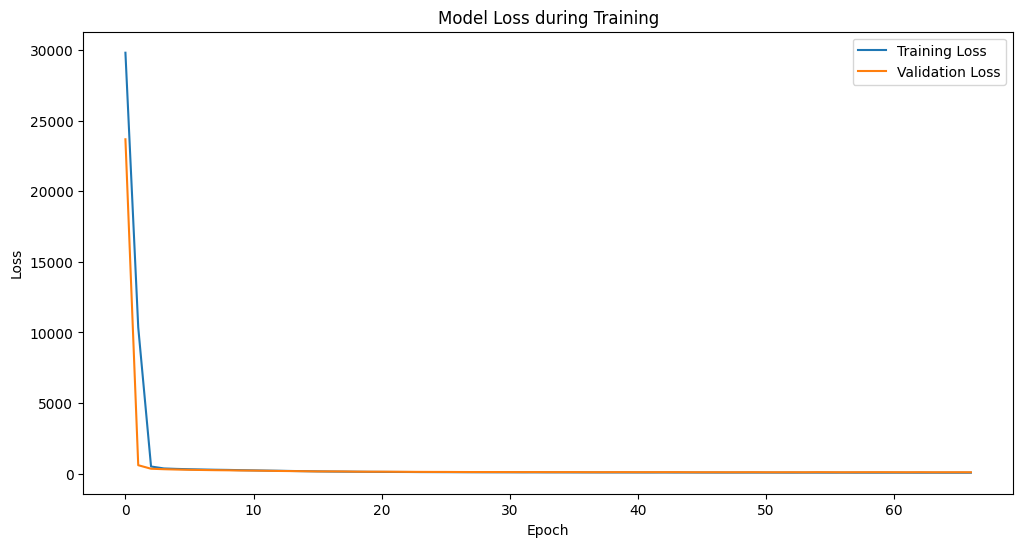

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss during Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

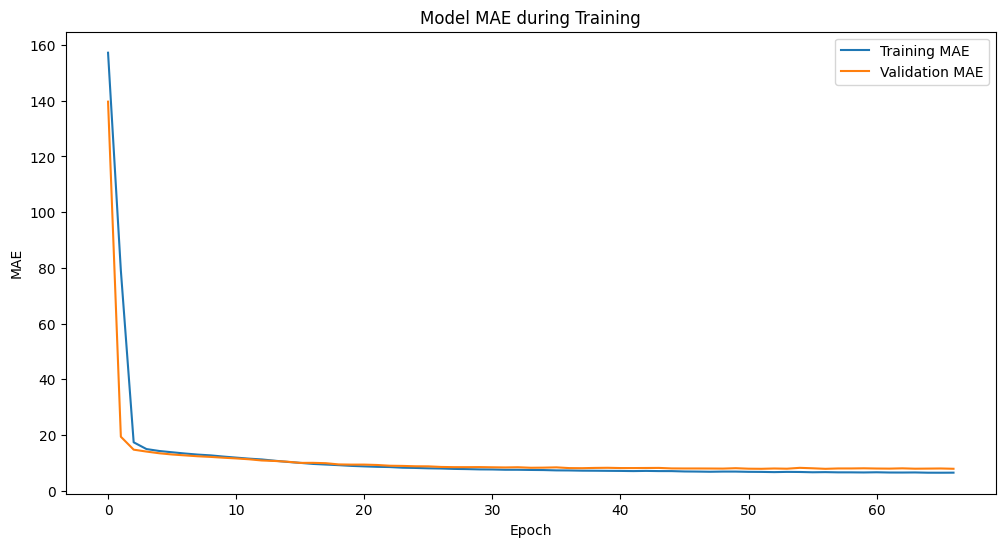

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE during Training')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()
plt.show()

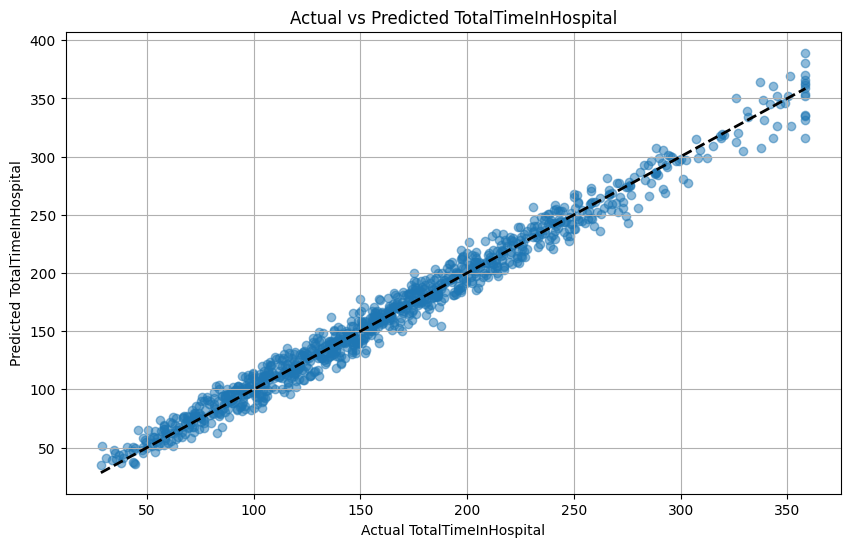

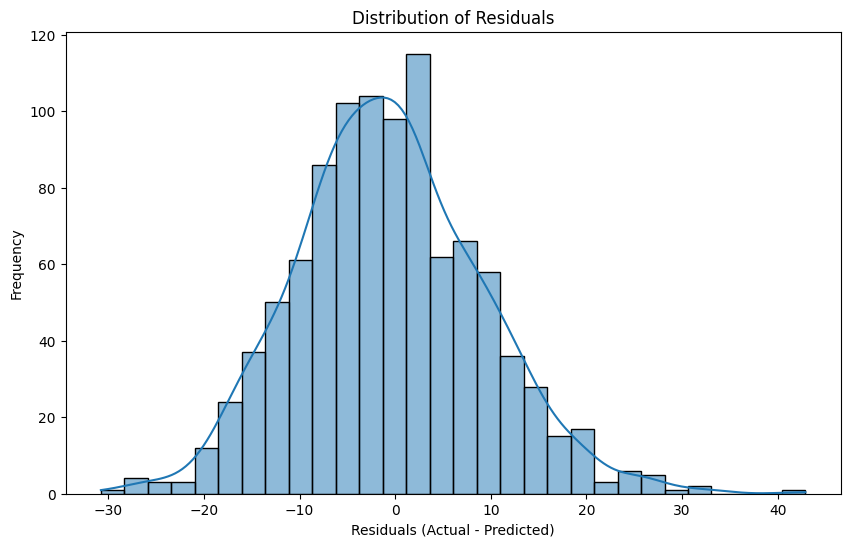

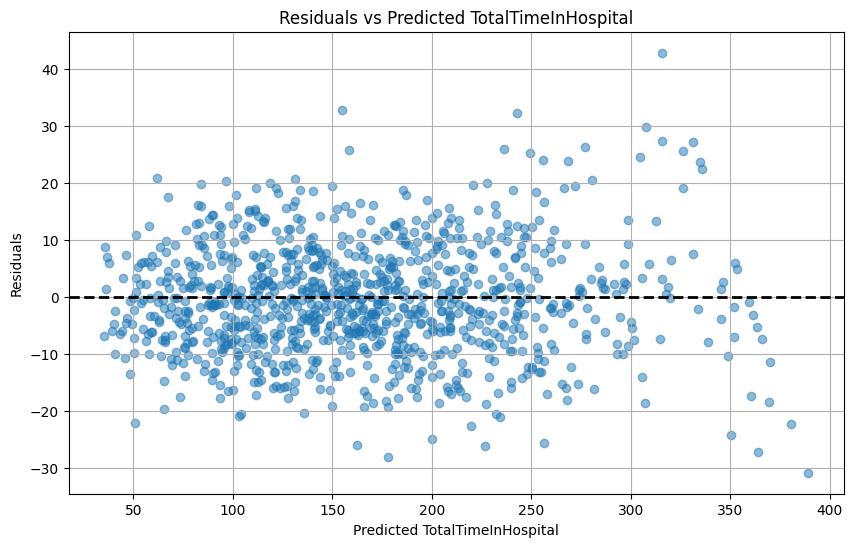

In [ ]:
# prompt: buatkan kode visualisasi hasil prediksi vs data asli

import matplotlib.pyplot as plt
# Visualisasi hasil prediksi vs data asli
plt.figure(figsize=(10, 6))
plt.scatter(y_test_tf, y_pred_tf, alpha=0.5)
plt.plot([y_test_tf.min(), y_test_tf.max()], [y_test_tf.min(), y_test_tf.max()], 'k--', lw=2)
plt.xlabel("Actual TotalTimeInHospital")
plt.ylabel("Predicted TotalTimeInHospital")
plt.title("Actual vs Predicted TotalTimeInHospital")
plt.grid(True)
plt.show()

# Visualisasi Residuals
residuals = y_test_tf - y_pred_tf.flatten() # Gunakan .flatten() karena y_pred_tf bisa berupa array 2D

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_tf, residuals, alpha=0.5)
plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.xlabel("Predicted TotalTimeInHospital")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted TotalTimeInHospital")
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from datetime import datetime

# Fungsi untuk menangani input dan default values
def process_input(poli, keluhan, input_date):
    # 1. Mengonversi tanggal input ke datetime (gunakan tanggal saat ini jika kosong)
    try:
        visit_date = pd.to_datetime(input_date, format='%d-%m-%Y', errors='coerce')  # Menggunakan format DD-MM-YYYY
        if pd.isna(visit_date):  # Jika tanggal tidak valid
            visit_date = datetime.now()  # Set default ke hari ini jika input tidak valid
    except Exception as e:
        visit_date = datetime.now()  # Set default ke hari ini jika ada error lainnya

    # 2. Tentukan Year, Month, Day, DayOfWeek, Quarter berdasarkan tanggal input
    year = visit_date.year
    month = visit_date.month
    day = visit_date.day
    day_of_week = visit_date.weekday()  # 0 = Monday, 6 = Sunday
    quarter = (month - 1) // 3 + 1  # Menghitung quarter (1, 2, 3, atau 4)

    # 3. Tentukan apakah akhir pekan atau bukan (default)
    is_weekend = 1 if day_of_week >= 5 else 0  # 1 untuk akhir pekan, 0 untuk weekdays

    # 4. Buat dictionary untuk fitur input
    input_dict = {
        "TotalDelayTime": 151.22,  # Menggunakan mean dari TotalDelayTime
        "TriageToProviderStartTime": 49.53,  # Menggunakan mean dari TriageToProviderStartTime
        "TestsToDischargeTime": 44.88,  # Menggunakan mean dari TestsToDischargeTime
        "ProviderEndToTestsCompleteTime": 38.27,  # Menggunakan mean dari ProviderEndToTestsCompleteTime

        # Department Poliklinik yang spesifik
        "Department_Poli Gigi": 0.10 if poli == "Poli Gigi" else 0.00,
        "Department_Poli KIA/KB": 0.10 if poli == "Poli KIA/KB" else 0.00,
        "Department_Poli Lansia": 0.10 if poli == "Poli Lansia" else 0.00,
        "Department_Poli Umum": 0.69 if poli == "Poli Umum" else 0.00,

        # Fitur lainnya
        "ProvidersOnShift": 4.98,  # Menggunakan mean dari ProvidersOnShift
        "NursesOnShift": 9.01,  # Menggunakan mean dari NursesOnShift
        "StaffToPatientRatio": 0.30,  # Menggunakan mean dari StaffToPatientRatio

        # Data waktu
        "Year": year,  # Tahun kunjungan
        "Month": month,  # Bulan kunjungan
        "Day": day,  # Hari kunjungan
        "DayOfWeek": day_of_week,  # Hari dalam minggu
        "IsWeekend": is_weekend,  # Apakah akhir pekan
        "Quarter": quarter,  # Kuartal kunjungan
    }

    # 5. Kembalikan dictionary hasil gabungan
    return input_dict


In [ ]:
# Simpan model TensorFlow
print("\nMenyimpan model TensorFlow...")
model_tf.save('model_prediksi_masuk_poli.h5')
print("Model TensorFlow berhasil disimpan sebagai 'model_prediksi_masuk_poli.h5'.")

# Simpan scaler
print("\nMenyimpan scaler...")
import joblib
joblib.dump(scaler, 'scaler.save')
print("Scaler berhasil disimpan sebagai 'scaler.save'.")


Menyimpan model TensorFlow...
Model TensorFlow berhasil disimpan sebagai 'model_prediksi_masuk_poli.h5'.

Menyimpan scaler...
Scaler berhasil disimpan sebagai 'scaler.save'.


In [ ]:
# Install tensorflowjs
!pip install tensorflowjs

from tensorflow.keras.models import load_model
import tensorflowjs as tfjs
import os

# Pastikan model Anda sudah disimpan dalam format HDF5 atau SavedModel
# Ganti '<Path to your model>' dengan path ke file atau direktori model Anda
# Contoh jika model disimpan dalam format HDF5: 'model_prediksi_durasi_poli.h5'
# Contoh jika model disimpan dalam format SavedModel: 'saved_model/my_model_tensorflow'
model_path = '/content/model_prediksi_masuk_poli.h5'

# Tentukan path output untuk model TensorFlow.js yang dikonversi
# Ini akan menjadi sebuah direktori
output_path = 'model_tfjs'

# Buat direktori output jika belum ada
if not os.path.exists(output_path):
    os.makedirs(output_path)
    print(f"Direktori '{output_path}' dibuat.")

try:
    # Muat model TensorFlow/Keras Anda
    # Perhatikan bahwa load_model akan memuat objek model, bukan string path
    model = load_model(model_path)
    print(f"Model berhasil dimuat dari '{model_path}'.")

    # Konversi model ke format TensorFlow.js
    tfjs.converters.save_keras_model(model, output_path)
    print(f"Model berhasil dikonversi dan disimpan di direktori '{output_path}'.")

except Exception as e:
    print(f"Terjadi error saat memuat atau mengonversi model: {e}")
    print("Pastikan path model sudah benar dan model ada di lokasi tersebut.")
    print("Pastikan juga Anda sudah menginstal tensorflowjs (pip install tensorflowjs).")

Model berhasil dimuat dari '/content/model_prediksi_masuk_poli.h5'.
failed to lookup keras version from the file,
    this is likely a weight only file
Model berhasil dikonversi dan disimpan di direktori 'model_tfjs'.
